In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# custom files
import model_best_hyperparameters
import columns
from columns import *
from imblearn.over_sampling import RandomOverSampler

# read train data
ds = pd.read_csv("C:/Users/maxim/Chess/data/games.csv")

In [2]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  16 

columns:  ['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
# feature engineering
missing = []
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

In [5]:
#integer
numeric_columns = ds.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if ds[col].isnull().any():
        median_value = ds[col].median()
        ds[col].fillna(median_value, inplace=True)
#string
categorical_columns = ds.select_dtypes(include=['object','bool']).columns
map_dicts = dict()
for column in categorical_columns:
    ds[column] = ds[column].astype('category')
    map_dicts[column] = dict(zip(ds[column], ds[column].cat.codes))
    ds[column] = ds[column].cat.codes

ds.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,9068,0,1.504210e+12,1.504210e+12,13,2,2,110,1287,1500,11,1191,4524,248,1387,5
1,14512,1,1.504130e+12,1.504130e+12,16,3,0,298,16,1322,7748,1261,1987,71,750,4
2,14904,1,1.504130e+12,1.504130e+12,61,1,2,298,3823,1496,11,1500,16383,171,650,3
3,14350,1,1.504110e+12,1.504110e+12,61,1,2,187,2017,1439,134,1454,3770,241,992,3
4,3091,1,1.504030e+12,1.504030e+12,95,1,2,247,6056,1523,134,1469,15622,192,783,5


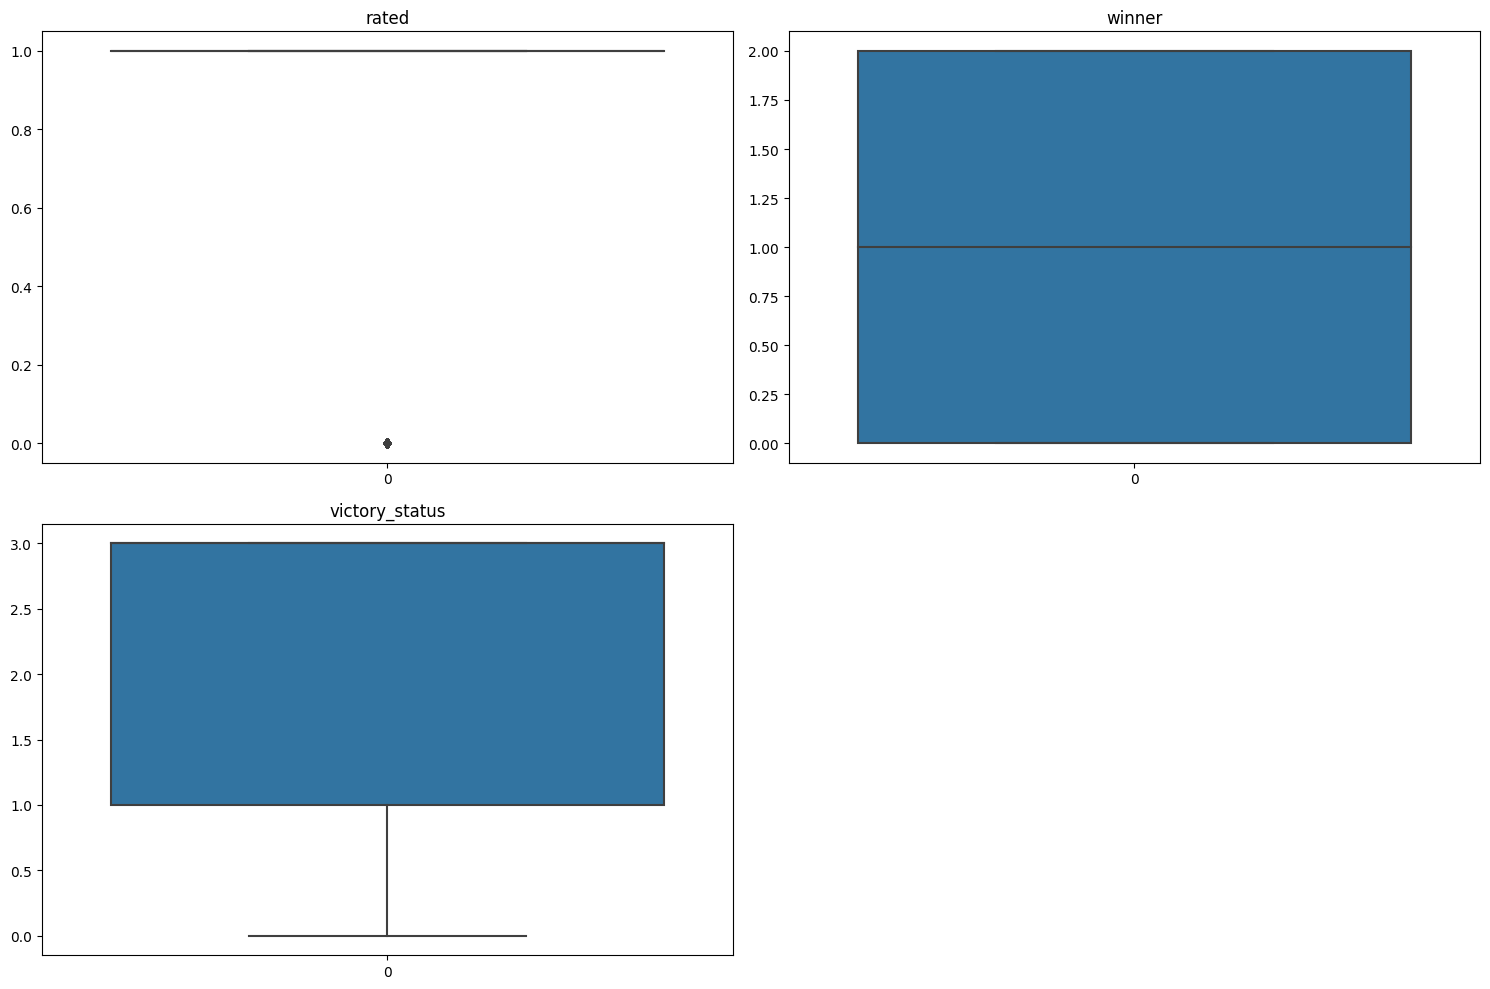

In [6]:
# Вибірка стовпців для візуалізації викидів
numeric_columns_for_plot = ['rated', 'winner', 'victory_status']

# Налаштування розміру графіка
plt.figure(figsize=(15, 10))

# Створення ящиків з вусами для кожного стовпця
for i, col in enumerate(numeric_columns_for_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(ds[ds[col].notnull()][col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [8]:
X = ds[X_columns]
y = ds[y_column]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
models = {
    'LinearRegression' : LinearRegression(),
'LGBMRegressor' :LGBMRegressor(),
'SGDRegressor' :SGDRegressor(),
'RandomForestRegressor' :RandomForestRegressor(),
'ElasticNet' :ElasticNet(),
'BayesianRidge' :BayesianRidge(),
'GradientBoostingRegressor' :GradientBoostingRegressor(),
'SVR' :SVR(),
}

In [11]:
regressors = dict()
for name, model in models.items():
    print('training ',name)
    regressor = model
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(metrics.mean_absolute_error(y_test, y_pred))
    print(metrics.mean_absolute_percentage_error(y_test, y_pred))
    regressors[name] = regressor

training  LinearRegression
0.8407719680844773
1858243033076252.0
training  LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2918
[LightGBM] [Info] Number of data points in the train set: 18052, number of used features: 15
[LightGBM] [Info] Start training from score 1.043652
0.5869499172421261
1282966957775205.8
training  SGDRegressor
2.9730916906395336e+32
5.9959699413158236e+47
training  RandomForestRegressor
0.7642721834496511
1688827409617737.8
training  ElasticNet
0.8426489010618243
1863398408405081.2
training  BayesianRidge
0.8411973374166108
1859564639809096.0
training  GradientBoostingRegressor
0.794393985295219
1775046062020871.5
training  SVR
0.9439556020543431
2490436608427247.0


In [12]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
model = {
    'RandomForestRegression': RandomForestRegressor(n_estimators=100, random_state=42)
}
rf_classifier = model['RandomForestRegression']
rf_classifier.fit(X_train, y_train)
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

X_columns = X.columns

Feature ranking:
1. white_rating (0.158034)
2. black_rating (0.138952)
3. turns (0.089390)
4. id (0.082505)
5. white_id (0.074646)
6. black_id (0.073520)
7. moves (0.072785)
8. opening_name (0.064907)
9. opening_eco (0.050266)
10. created_at (0.043547)
11. last_move_at (0.042857)
12. increment_code (0.040708)
13. opening_ply (0.033060)
14. victory_status (0.028275)
15. rated (0.006548)


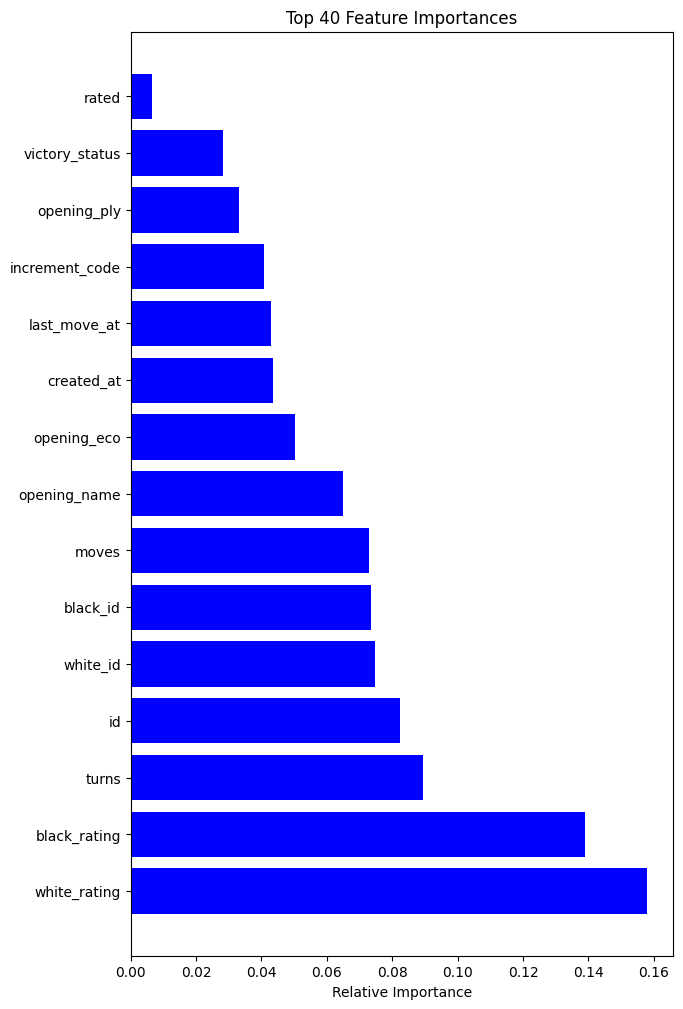

In [13]:
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))
top_40_indices = np.argsort(importances)[::-1][:40]


top_40_features = [X_columns[i] for i in top_40_indices]


top_40_importances = importances[top_40_indices]


plt.figure(figsize=(7, 12))
plt.title('Top 40 Feature Importances')
plt.barh(range(len(top_40_indices)), top_40_importances, color='b', align='center')
plt.yticks(range(len(top_40_indices)), top_40_features)
plt.xlabel('Relative Importance')
plt.show()

In [14]:
rf = RandomForestRegressor()

In [15]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Assume X_train, y_train are defined elsewhere

# Update the parameter grid for a regressor
param_grid = {
         'max_depth': [5,6], 
         'max_features': [0.5,0.6], 
         'min_samples_leaf': [3,4], 
         'min_samples_split': [10], 
         'n_estimators': [60]}

# Setup scorer for regression
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the regressor
rf = RandomForestRegressor()

# Setup GridSearchCV
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5, verbose=3, return_train_score=True)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=-0.812, test=-0.834) total time=   3.6s
[CV 2/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=-0.814, test=-0.842) total time=   4.2s
[CV 3/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=-0.819, test=-0.836) total time=   3.4s
[CV 4/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=-0.815, test=-0.830) total time=   3.7s
[CV 5/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=-0.810, test=-0.845) total time=   3.6s
[CV 1/5] END max_depth=5, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=(train=-0.810, test=-0.830) total time=   3.9

In [17]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),
                          pd.DataFrame(grid.cv_results_["mean_test_score"], 
                          columns=["precision"])],
                          axis=1)

grid_results

,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,precision
0,5,0.5,3,10,60,-0.837529
1,5,0.5,4,10,60,-0.837155
2,5,0.6,3,10,60,-0.828906
3,5,0.6,4,10,60,-0.829370
4,6,0.5,3,10,60,-0.824204
5,6,0.5,4,10,60,-0.822902
6,6,0.6,3,10,60,-0.817622
7,6,0.6,4,10,60,-0.817337


In [18]:
X = ds.drop(columns=['winner'])
y = ds['winner']
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  

X, y = ros.fit_resample(X, y)
X.shape, y.shape

((30003, 15), (30003,))

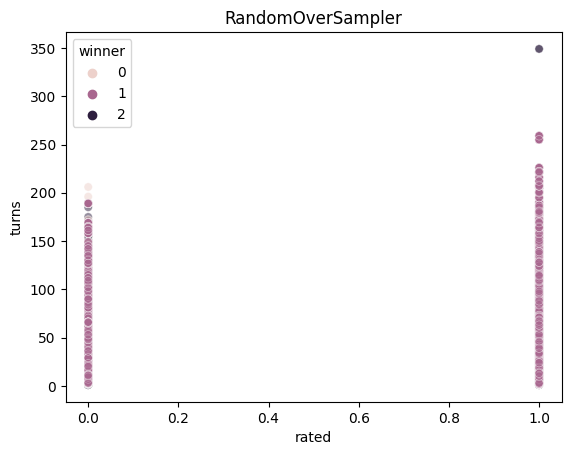

In [19]:
sns.scatterplot(
    data=X, x="rated", y="turns", hue=y, alpha=0.5
)

plt.title('RandomOverSampler')
plt.show()

In [20]:
from imblearn.under_sampling import RandomUnderSampler

X = ds.drop(columns=['winner'])
y = ds['winner']

rus = RandomUnderSampler(
    sampling_strategy='auto',  # вибираю тільки мажоритарний клас
    random_state=0,  # для відтворюваності
    replacement=True # якщо потрібно передискретизувати із заміною
)  

X, y = rus.fit_resample(X, y)
X.shape, y.shape

((2850, 15), (2850,))

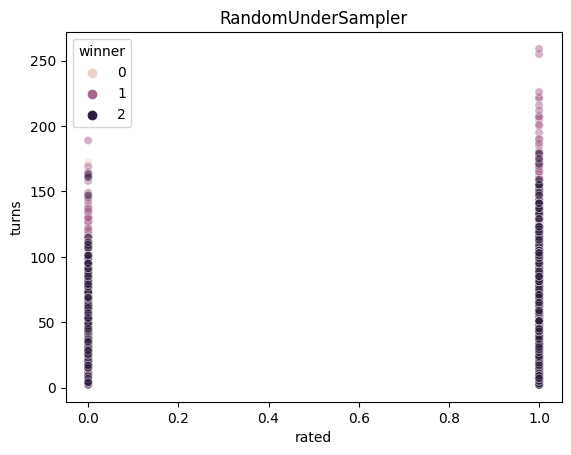

In [21]:
sns.scatterplot(
    data=X, x="rated", y="turns", hue=y, alpha=0.5
)

plt.title('RandomUnderSampler')
plt.show()